# Library&Package Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

# Brief Exploration of Each Dataset

In [2]:
dna_df = pd.read_excel("codon_usage.xlsx")
dna_df

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


#### <span style="color: red">As shown above, there are 13028 entries and 69 columns in this dataset. In other words, the dataset contains 1 output, and 68 raw features. And the 68 raw features contain two categorical variables "Kingdom" and "SpeciesName". 

#### <span style="color: red">For classification, we will predict the output "DNAtype" by utilizing the 13028 samples and the rest of 68 features.

Text(0.5, 1.0, 'Relative frequency of each DNAtype')

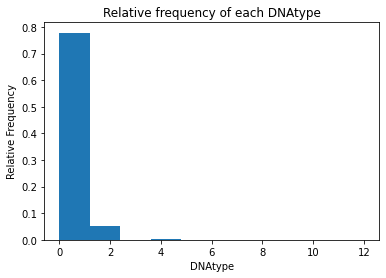

In [3]:
a = plt.hist(dna_df["DNAtype"],density=True)
plt.xlabel('DNAtype')
plt.ylabel('Relative Frequency')
plt.title('Relative frequency of each DNAtype')

#### <span style="color: red"> As the DNAtype histogram shown above, we can tell that most of the DNAtype fall into Type 0 and Type 1.
    
#### <span style="color: red"> To approach the DNAtype distribution more intelligently, we will plot it  and compute the exact numbers of each Type as shown below.

Text(0.5, 1.0, 'Relative frequency of each DNAtype')

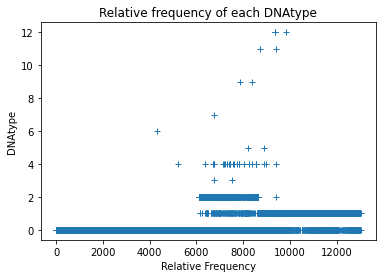

In [4]:
a = plt.plot(dna_df["DNAtype"],'+')
plt.xlabel('Relative Frequency')
plt.ylabel('DNAtype')
plt.title('Relative frequency of each DNAtype')

In [5]:
df = pd.DataFrame(dna_df["DNAtype"])
count = df.value_counts()
count_dna_df = pd.DataFrame({'Type Count': count})
count_dna_df

,Type Count
DNAtype,
0,9267
1,2899
2,816
4,31
12,5
3,2
5,2
9,2
11,2


#### <span style="color: red">  As shown above, we can tell that the majority of the samples fall in the Type 0, Type 1, and Type 2. There are only few samples belong to the rest Type.

<AxesSubplot:>

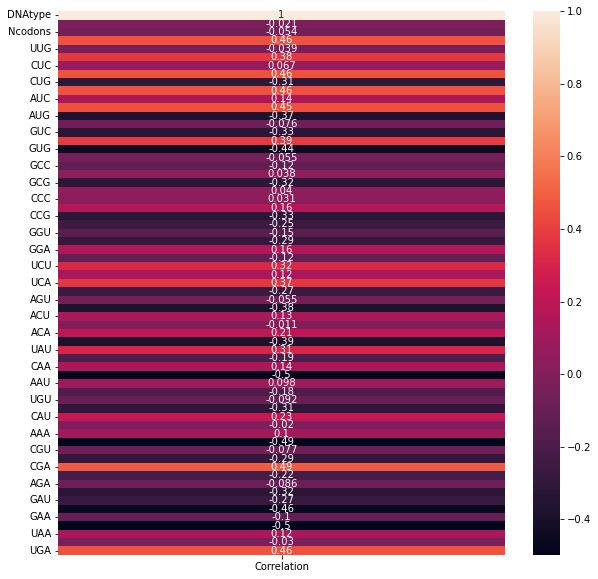

In [6]:
corr = dna_df.corr()
corr_dna_df = pd.DataFrame({'Correlation': corr['DNAtype']})
plt.figure(figsize=(10,10))
sns.heatmap(corr_dna_df,annot=True)

#### <span style="color: red">  As the correlation heapmap show above, we can tell that each feature has different degree of influence on predicting the DNAtype.

# Pre-Processing the Dataset

In [7]:
missing_rate = dna_df.isnull().sum() * 100 / len(dna_df)
missing_rate_dna_df = pd.DataFrame({'missing_rate': missing_rate})
print(missing_rate_dna_df)
print(missing_rate_dna_df.describe())

             missing_rate
Kingdom               0.0
DNAtype               0.0
SpeciesID             0.0
Ncodons               0.0
SpeciesName           0.0
...                   ...
GAA                   0.0
GAG                   0.0
UAA                   0.0
UAG                   0.0
UGA                   0.0

[69 rows x 1 columns]
       missing_rate
count          69.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max             0.0


#### <span style="color: red">  As shown above, there is no missing values in the dataset. Therefore, we do not need to replace or remove the invalid entries.

In [8]:
dna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

#### <span style="color: red">  We notice that "SpeciesID" and "SpeciesName" are just the unique variables that are computationally irrelevant in processing the dataset. So DELET them.
#### <span style="color: red">  "UUU" and "UUC" contain at least a non-int or non-float data type, so we have to find them out and DELET the corresponding samples. "UUU" and "UUC" are supposed to be in float data type as the rest of biological features are.
#### <span style="color: red">  "Kingdom" is in object data type which is needed to be converted into int type.

In [9]:
dna_df_updated = dna_df
dna_df_updated = dna_df.drop(columns=['SpeciesID','SpeciesName'])
np.shape(dna_df_updated)

(13028, 67)

#### <span style="color: red">  As shown above, 'SpeciesID' and 'SpeciesName' are removed. The features of dataset is reduced from 69 to 67.

In [10]:
x = 0
for i in range(13028):
    x = isinstance(dna_df_updated['UUU'][i],(int,float))
    if x == False:
        print("The index of the non-int or non-float entry:")
        print(i)
        print("The value of that entry:")
        print(dna_df_updated['UUU'][i])
        print("--------------------------------------------")

The index of the non-int or non-float entry:
486
The value of that entry:
non-B hepatitis virus
--------------------------------------------
The index of the non-int or non-float entry:
5063
The value of that entry:
12;I
--------------------------------------------


#### <span style="color: red">  As shown above, the indexs of the non-int or non-float entry in "UUU" are found.

In [11]:
x = 0
for i in range(13028):
    x = isinstance(dna_df_updated['UUC'][i],(int,float))
    if x == False:
        print("The index of the non-int or non-float entry:")
        print(i)
        print("The value of that entry:")
        print(dna_df_updated['UUC'][i])
        print("--------------------------------------------")

The index of the non-int or non-float entry:
5063
The value of that entry:
-
--------------------------------------------


#### <span style="color: red"> As shown above, the indexs of the non-int or non-float entry in "UUC" are found.

In [12]:
dna_df_updated1 = dna_df_updated
dna_df_updated1 = dna_df_updated.drop(486)
dna_df_updated2 = dna_df_updated1.drop(5063)
dna_df_updated2['UUU'] = pd.to_numeric(dna_df_updated2['UUU'])
dna_df_updated2['UUC'] = pd.to_numeric(dna_df_updated2['UUC'])
dna_df_updated2.shape

(13026, 67)

#### <span style="color: red">  As shown above, the corresponding samples are removed from dataset. The number of samples is reduced from 13028 to 13026.

In [13]:
dna_df_updated2['Kingdom'] = preprocessing.LabelEncoder().fit_transform(dna_df_updated2['Kingdom'])
corr_dna_df = pd.DataFrame({'Kingdom': dna_df_updated2['Kingdom']})
dna_df_updated2['Kingdom']

0        9
1        9
2        9
3        9
4        9
        ..
13023    7
13024    7
13025    7
13026    7
13027    7
Name: Kingdom, Length: 13026, dtype: int32

#### <span style="color: red">  As shown above, the string types in "Kingdom" are converted into int types.

In [14]:
dna_df_updated2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13026 entries, 0 to 13027
Data columns (total 67 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Kingdom  13026 non-null  int32  
 1   DNAtype  13026 non-null  int64  
 2   Ncodons  13026 non-null  int64  
 3   UUU      13026 non-null  float64
 4   UUC      13026 non-null  float64
 5   UUA      13026 non-null  float64
 6   UUG      13026 non-null  float64
 7   CUU      13026 non-null  float64
 8   CUC      13026 non-null  float64
 9   CUA      13026 non-null  float64
 10  CUG      13026 non-null  float64
 11  AUU      13026 non-null  float64
 12  AUC      13026 non-null  float64
 13  AUA      13026 non-null  float64
 14  AUG      13026 non-null  float64
 15  GUU      13026 non-null  float64
 16  GUC      13026 non-null  float64
 17  GUA      13026 non-null  float64
 18  GUG      13026 non-null  float64
 19  GCU      13026 non-null  float64
 20  GCC      13026 non-null  float64
 21  GCA      130

#### <span style="color: red">  As the updated dataset info shown above, the dataset is pre-processed where 2 computationally irrelevant features are removed, 2 invalid samples are found and removed, "Kingdom" are converted from str type to int type.

# Feature Extraction

## Normalization:

In [15]:
y = dna_df_updated2['DNAtype']
x = dna_df_updated2.drop(columns=['DNAtype'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[9.00000000e-01, 2.44702727e-05, 7.61159687e-02, ...,
        5.55309735e-02, 1.95236236e-02, 0.00000000e+00],
       [9.00000000e-01, 1.16571952e-05, 1.24896457e-01, ...,
        5.99557522e-02, 2.65521281e-02, 0.00000000e+00],
       [9.00000000e-01, 9.49790886e-05, 9.08421537e-02, ...,
        8.65044248e-02, 0.00000000e+00, 1.34957826e-02],
       ...,
       [7.00000000e-01, 1.68709619e-05, 6.54855039e-02, ...,
        7.87610619e-02, 4.64662241e-02, 1.89034677e-01],
       [7.00000000e-01, 1.00000000e+00, 8.08559595e-02, ...,
        2.19026549e-02, 3.08473253e-02, 1.46204311e-02],
       [7.00000000e-01, 2.21289914e-01, 8.18223654e-02, ...,
        3.45132743e-02, 4.45138618e-02, 2.02530459e-01]])

#### <span style="color: red">  As shown above, we divide our dataframe into input x and output y. And we normalize the input x.

## PCA:

In [16]:
pca = PCA(n_components = 10)  
x_scaled = pca.fit_transform(x_scaled) 
pca.explained_variance_ratio_

array([0.30626258, 0.21888372, 0.11783075, 0.04071515, 0.02956201,
       0.02832973, 0.02117799, 0.01704333, 0.01630338, 0.0129433 ])

#### <span style="color: red">  As shown above, we compute the percentages of variance explained for each principal component.

Text(0.5, 1.0, 'Principal component V.S. Percentage of variance explained')

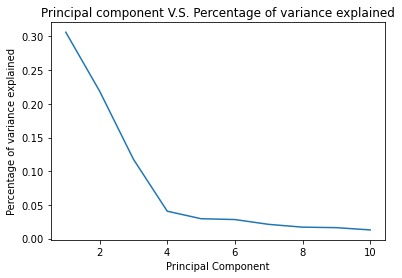

In [17]:
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.title('Principal component V.S. Percentage of variance explained')

#### <span style="color: red">  As shown above, the first 4 principal components already contain the majoirty of information. To obtain even more information, we decide to have 10 principal components. In other words, the dimension of the dataset is reduced to 10D.

## Cross-validation setup:

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20,random_state=20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10420, 10) (2606, 10) (10420,) (2606,)


#### <span style="color: red">  The dataset is divided into the trainning set and testing set. And the cross-validation ration is 8:2.

# First Classification Method: LogisticRegression

In [19]:
default = {"penalty":"l2"}
LR_model = LogisticRegression(**default)
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)

#### <span style="color: red">  As shown above, the parameters is setup and the predicted output y_pred is trained.

In [20]:
acc = accuracy_score(y_test, y_pred)
print("accuracy_score: ",acc)

accuracy_score:  0.9811972371450499


#### <span style="color: red"> As shown above, we compute the scores of accuracy. And it has 98.1% scores which seem good in our model.

#### <span style="color: red">  To further investigate the performace of our model, we will visualize the performance as shown below.

Text(0.5, 1.0, 'Confusion Matrix')

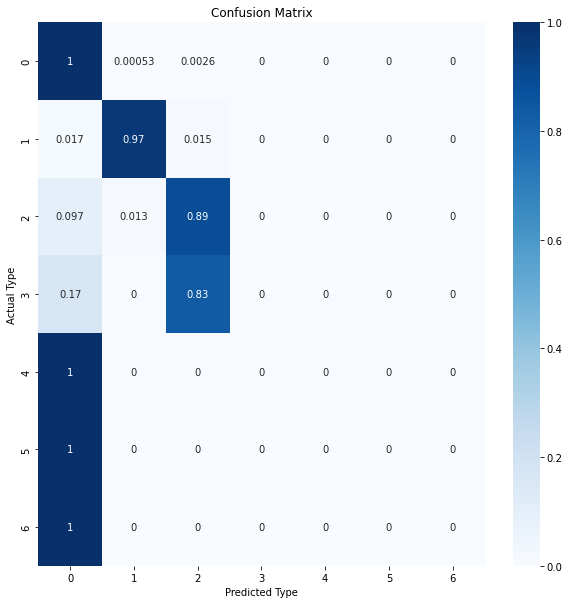

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'),annot = True,cmap = 'Blues')
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.title('Confusion Matrix')

#### <span style="color: red">  As the confusion matrix shown above, we can tell that the model have a fairly good accuracy in predicting Type 0, Type 1, and Type2. Nonetheless, the model fails to predct the rest of the DNAtype, and 83% of Type 3 are falsely label in Type 2.

In [22]:
df = pd.DataFrame(y_pred)
count1 = df.value_counts()
count1

0    1923
1     527
2     156
dtype: int64

Text(0.5, 1.0, 'Frequency of each predicted type')

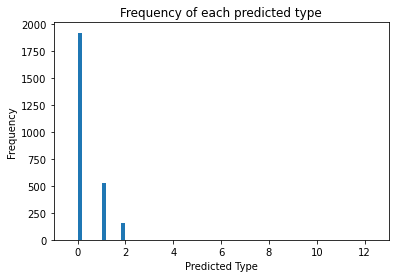

In [23]:
plt.hist(y_pred)
plt.xlim(-1,13)
plt.xlabel('Predicted Type')
plt.ylabel('Frequency')
plt.title('Frequency of each predicted type')

Text(0.5, 1.0, 'Relative frequency of each predicted DNAtype')

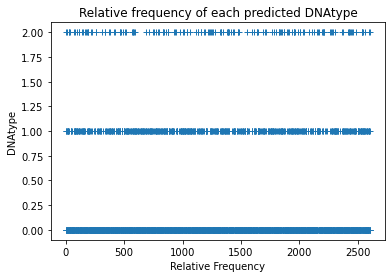

In [24]:
plt.plot(y_pred,'+')
plt.xlabel('Relative Frequency')
plt.ylabel('DNAtype')
plt.title('Relative frequency of each predicted DNAtype')

#### <span style="color: red">  As the visualizations shown above, the logistic regression method fails to predict the DNAtypes other than Type 0, Type 1, and Type 2, even though our model has an accuracy of 98.1%.

## Second Classification Method: KNN

In [25]:
default = {"n_neighbors":3}
KNN_model = KNeighborsClassifier(**default)
KNN_model.fit(x_train,y_train) 
y_pred1=KNN_model.predict(x_test)

#### <span style="color: red">  As shown above, we set n_neighbors to 3, and the predicted output y_pred1 is trained.

In [26]:
acc1 = accuracy_score(y_test, y_pred1)
print("accuracy_score: ",acc1)

accuracy_score:  0.9919416730621642


#### <span style="color: red"> As shown above, we compute the scores of accuracy. And it has the value of 99.2% which is better than logistic regression model. 
#### <span style="color: red"> To further investigate the performace of our model, we will visualize the performance as shown below.

Text(0.5, 1.0, 'Confusion Matrix')

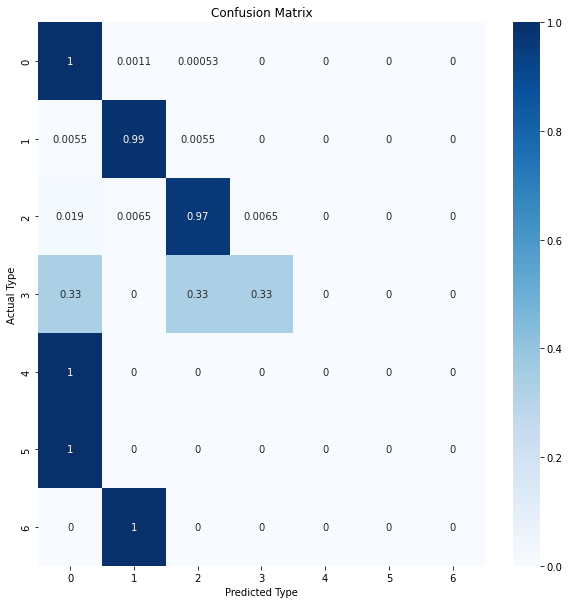

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred1, normalize = 'true'),annot = True,cmap = 'Blues')
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.title('Confusion Matrix')

In [28]:
df = pd.DataFrame(y_pred1)
count2 = df.value_counts()
count2_dna_df = pd.DataFrame({'Type Count': count2})
count2_dna_df

,Type Count
0,
0,1908
1,539
2,156
4,3


Text(0.5, 1.0, 'Frequency of each predicted type')

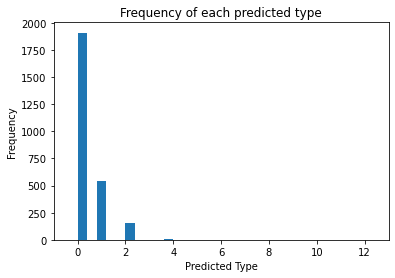

In [29]:
a = plt.hist(y_pred1)
plt.xlim(-1,13)
plt.xlabel('Predicted Type')
plt.ylabel('Frequency')
plt.title('Frequency of each predicted type')

Text(0.5, 1.0, 'Relative frequency of each predicted DNAtype')

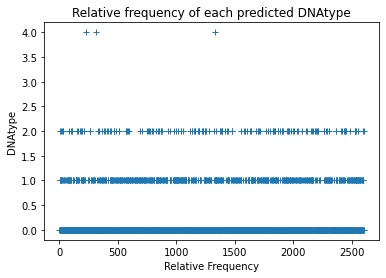

In [30]:
plt.plot(y_pred1,'+')
plt.xlabel('Relative Frequency')
plt.ylabel('DNAtype')
plt.title('Relative frequency of each predicted DNAtype')

#### <span style="color: red">  As the visualizations shown above, the KNN method can predict Type 0, Type 1, Type 2, and Type 4 which is better than logistic regression method since LR method can only predict 3 DNAtypes.

# Comparative analysis

Text(0.5, 1.0, 'Relative frequency of each predicted DNAtype for RL and KNN')

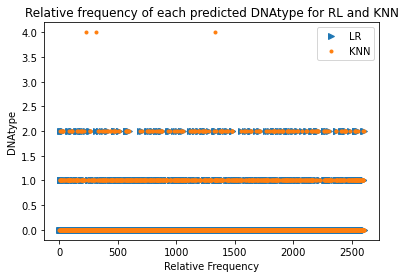

In [31]:
plt.plot(y_pred,'>')
plt.plot(y_pred1,'.')
plt.legend(["LR", "KNN"])
plt.xlabel('Relative Frequency')
plt.ylabel('DNAtype')
plt.title('Relative frequency of each predicted DNAtype for RL and KNN')

Text(33.0, 0.5, 'KNN - Actual Type')

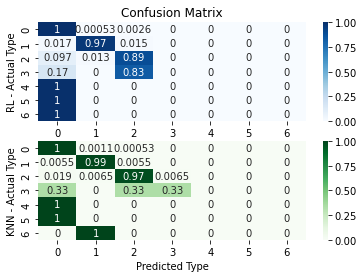

In [32]:
plt.subplot(2, 1, 1)
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'),annot = True,cmap = 'Blues')
plt.ylabel('RL - Actual Type')
plt.title('Confusion Matrix')

plt.subplot(2, 1, 2)
sns.heatmap(confusion_matrix(y_test, y_pred1, normalize = 'true'),annot = True,cmap = 'Greens')
plt.xlabel('Predicted Type')
plt.ylabel('KNN - Actual Type')

### <span style="color: red"> Since the dimension of the dataset is reduced before trainning the samples, both methods are supposed to have the same computational complexity. And from the visualisations of both methods, we can conclude that in processing this dataset KNN method performs better than logistic regression since the former method not only has a slightly higher accuracy, but mostly importantly it can predict one more DNAtype than the latter method.
### <span style="color: red"> Since the dataset does not have an uniform output distribution as the majority of DNAtype fall into Type 0, the high accuracy score might mislead one to believe the model has a good performance even it can only predict few DNAtype. 
### <span style="color: red"> And Finding a best fit of parameters is necessary to make a good model and prediction.